# Task 1.5: 20th Century Text Mining

## Import Libraries

In [1]:
# Import libraries
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilycurcio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emilycurcio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilycurcio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load Data

In [2]:
# Import text file
myfile = open('20th_century_wiki.txt', encoding = 'utf-8')

In [3]:
with open('20th_century_wiki.txt', 'r', errors = 'ignore') as file:
    data = file.read().replace('\n', '')

## Tokenize Words

In [4]:
# Word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Events', 'in', 'the', '20th', 'centuryToggle', 'Events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'dictatorship1.3Global', 'war', ':',

In [5]:
# Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4888 samples and 20364 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1285),
 ('the', 1095),
 (',', 990),
 ('of', 604),
 ('and', 397),
 ('to', 325),
 ('[', 303),
 (']', 303),
 ('The', 302),
 ('in', 290)]

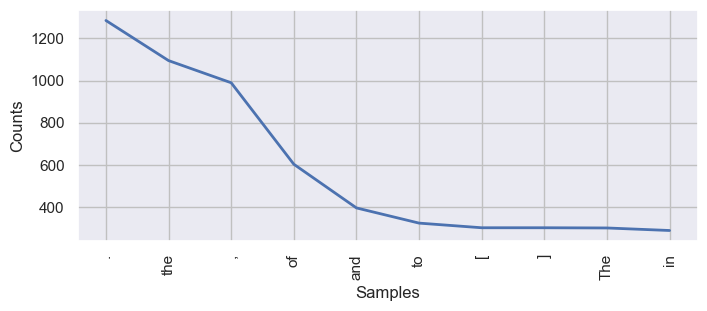

In [7]:
# Frequency distribution plot
plt.figure(figsize = (8, 3))
dist_words.plot(10, cumulative = False)
plt.show()

## Remove Stop Words and Punctuation Marks

In [8]:
# Defining stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{"weren't", 'a', "hasn't", "should've", 'are', 'haven', 'y', "you'd", 'it', 'herself', 'that', 'or', 'hadn', 'll', 'himself', "you're", 'he', 'd', 'which', 'can', 'been', "it's", 'in', 'and', 'during', 'yours', 'between', "won't", 'was', 'doing', 'couldn', 'own', 'down', 't', 'mightn', "shan't", 'the', "doesn't", 'once', 'an', 'm', 'few', "needn't", "wasn't", 'him', 'some', 'before', 'below', 'not', 'further', 'were', 'above', 'his', 'aren', 'both', 'most', "mightn't", 'she', 'to', "don't", 'do', 'against', 'into', 'now', 'same', 'from', 'about', 'their', 'how', 'your', 'being', 'other', 'isn', 'wouldn', 'i', "haven't", 'my', 'won', 'only', 'shouldn', 'so', 'had', 'be', 'yourself', 're', 'did', 'her', "couldn't", 'more', 'has', 'then', 'ourselves', 'what', 'didn', 'no', 'after', 'weren', 'doesn', 's', 'our', 'with', 'me', 'of', 'why', 'very', 'themselves', 'ma', 'am', 'because', 'ours', 'any', 'just', 'them', 've', "aren't", 'by', 'theirs', 'having', 'if', 'wasn', 'itself', 'for', 'has

In [9]:
# Remove stop words
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [10]:
# Check
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchCreate',
 'accountLog',
 'inPersonal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Events',
 '20th',
 'centuryToggle',
 'Events',
 '20th',
 'century',
 'subsection1.1The',
 'world',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2The',
 'Russian',
 'Revolution',
 'Communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '1939–1945',
 ')',
 '1.3.1The',
 'war',

In [11]:
# Substitute all punctuations marks with a space 
sans_punc = re.sub('[^a-zA-Z]',     # Search for all non-letters
                   ' ',             # Replace all non-letters with spaces
                   str(filtered_words))

In [12]:
# Check
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Events      th    centuryToggle    Events      th    century    subsection   The    world    beginning    century               The    war    end    wars               World    War    I                                The    Russian    Revolution    Communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                The    war    Europe     Blitzkrieg     Operation    Barbarossa     Turning    tides     

In [13]:
# Word tokenization
tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Events', 'th', 'centuryToggle', 'Events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'All

In [14]:
# Create a new frequency distribution
dist_words_filter_2 = FreqDist(tokenized_word_2)

In [15]:
dist_words_filter_2.most_common(10)

[('The', 324),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 96),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43)]

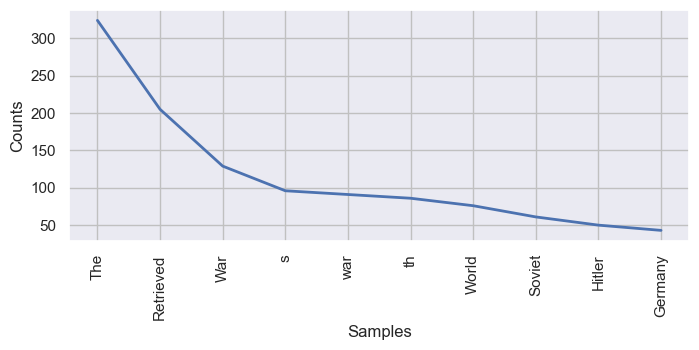

In [16]:
# Frequency distribution plot
plt.figure(figsize = (8, 3))
dist_words_filter_2.plot(10, cumulative = False)
plt.show()

#### The frequency distribution after removing stop words and punctuation marks becomes more descriptive of the contents of the wiki page.

#### 'the' with a lowercase 't' was removed as a stop word, however 'The' with a capital 'T' is still included in our list of words. We could consider putting everything in lower case before removing stop words in order to filter out all instances of 'the'. This could however cause issues if we want to identify proper nouns later on.

#### Another benefit to changing everything to lower case would be in cases like the word 'war'. This word is so common that both it's capitalized version and lower case version appear in the top 10 most frequent words. For our purposes, we do not need to differentiate between the two.

#### I was somewhat surprised to see 'Retrieved' as the second most common word. Names of countries and leaders, as well as the word 'war', are not surprising when talking about historical events. I likley would not have been able to guess the word 'retrieved' would be in the top ten words, however it does seem logical.

## POS Tags with TextBlob

In [17]:
# First look at top 30 most common words in our working list
dist_words_filter_2.most_common(30)

[('The', 324),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 96),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('century', 36),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34),
 ('edit', 33),
 ('Japan', 33),
 ('Germans', 32),
 ('New', 31),
 ('Union', 31),
 ('II', 30),
 ('United', 30),
 ('S', 30),
 ('ISSN', 30),
 ('Europe', 29)]

In [18]:
# List additional new stop words
new_stopwords = ['The', 's', 'th', 'In', 'S']

In [19]:
# Remove additional new stop words
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [20]:
%%time
text = TextBlob(str(filtered))

CPU times: user 7.2 ms, sys: 1.5 ms, total: 8.7 ms
Wall time: 8.41 ms


In [21]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Events', 'centuryToggle', 'Events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive', 'Final', 'days', 'Holocaust', '

In [22]:
tags_list = text.tags

In [23]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 'POS'),
 ("'more

In [24]:
# Convert tags list to df
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', 'Word type']

In [25]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [26]:
# Group by word type
df_t = df_text.groupby('Word type').count().reset_index()

In [27]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [28]:
# Top 10 POS tags
top10 = df_t.nlargest(10, 'Words')

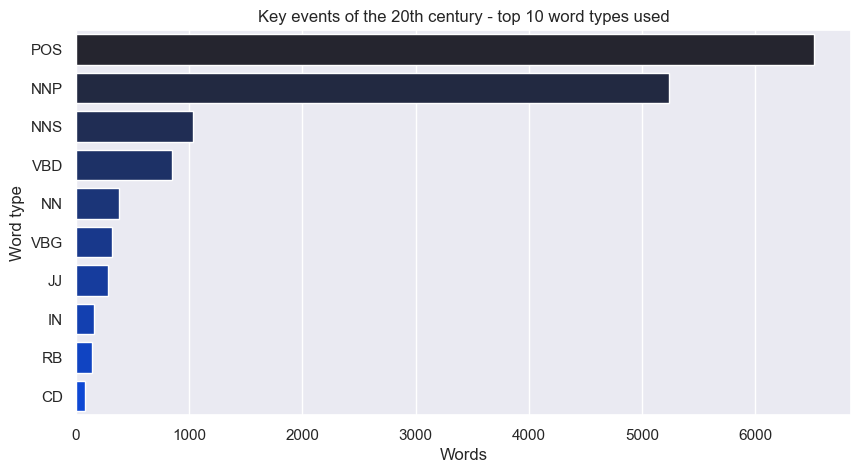

In [29]:
# Plot top 10 POS tags
plt.figure(figsize = (10, 5))
with sns.dark_palette('xkcd:blue', 10):
    sns.barplot(x = 'Words', y = 'Word type',
    saturation = 0.9, data = top10).set_title('Key events of the 20th century - top 10 word types used')

In [30]:
# Look at nouns only
df = df_text[(df_text['Word type'] == 'NN') | (df_text['Word type'] == 'NNS') | (df_text['Word type'] == 'NNP')]
df.columns = ['Word', 'Occurences']
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending = False)
top15 = y.nlargest(15, 'Occurences')

In [31]:
top15

,Word,Occurences
1244,'War,129
2589,'war,91
1294,'World,76
1096,'Soviet,61
531,'Hitler,50
530,'History,41
2622,'www,39
2615,'world,39
556,'ISBN,39
1774,'first,38


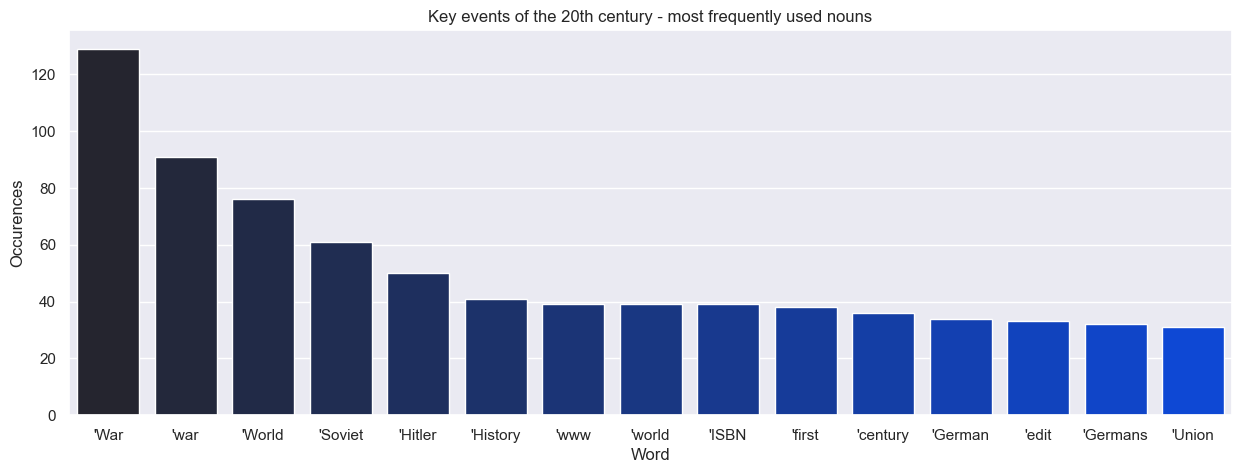

In [32]:
plt.figure(figsize = (15, 5))
with sns.dark_palette('xkcd:blue', 15):
    sns.barplot(x = 'Word', y = 'Occurences',
    saturation = 0.9, data = top15).set_title('Key events of the 20th century - most frequently used nouns')

#### The frequency of the word 'war' definitely stands out (and the absence of the word 'peace'). I suspect this might contribute to a more negative sentiment analysis. Words like 'Soviet' and 'Hitler' and 'German'/'Germans' stand out and lead me to believe that World War 2 was one of the biggest events of the 20th century.

In [33]:
# Look at verbs only
df = df_text[(df_text['Word type'] == 'VB')  | (df_text['Word type'] == 'VBD')]
df.columns = ['Word', 'Occurences']
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending = False)
top15 = y.nlargest(15, 'Occurences')

In [34]:
top15

,Word,Occurences
27,'Retrieved,205
36,'United,30
0,'Allied,19
196,'led,15
316,'used,13
194,'launched,12
1,'Archived,10
93,'controlled,9
161,'forced,8
300,'surrendered,7


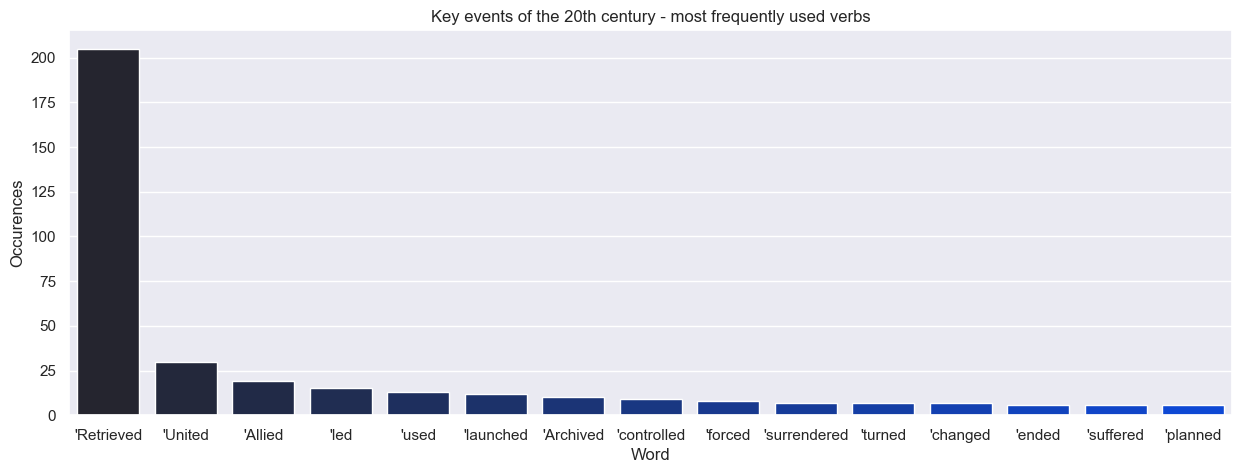

In [35]:
plt.figure(figsize = (15, 5))
with sns.dark_palette('xkcd:blue', 15):
    sns.barplot(x = 'Word', y = 'Occurences',
    saturation = 0.9, data = top15).set_title('Key events of the 20th century - most frequently used verbs')

#### The word 'Retrieved' stands out as it is by far the most frequently used verb. Retrieve can mean recover, rescue, win back, etc. which all make sense in the context of international relations and war. The word 'United' stands out as the second most frequently used verb, however this might be referring to The United States rather than the verb 'united'. This could be worth investigating further, especially if we want to perform a sentiment analysis since the verb 'united' is a rather positive one.

In [36]:
# Look at adjectives only
df = df_text[df_text['Word type'] == 'JJ']
df.columns = ['Word', 'Occurences']
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending = False)
top15 = y.nlargest(15, 'Occurences')

In [37]:
top15

,Word,Occurences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
42,'Russian,6
103,'political,6
1,'African,6
104,'possible,5
7,'Baltic,5


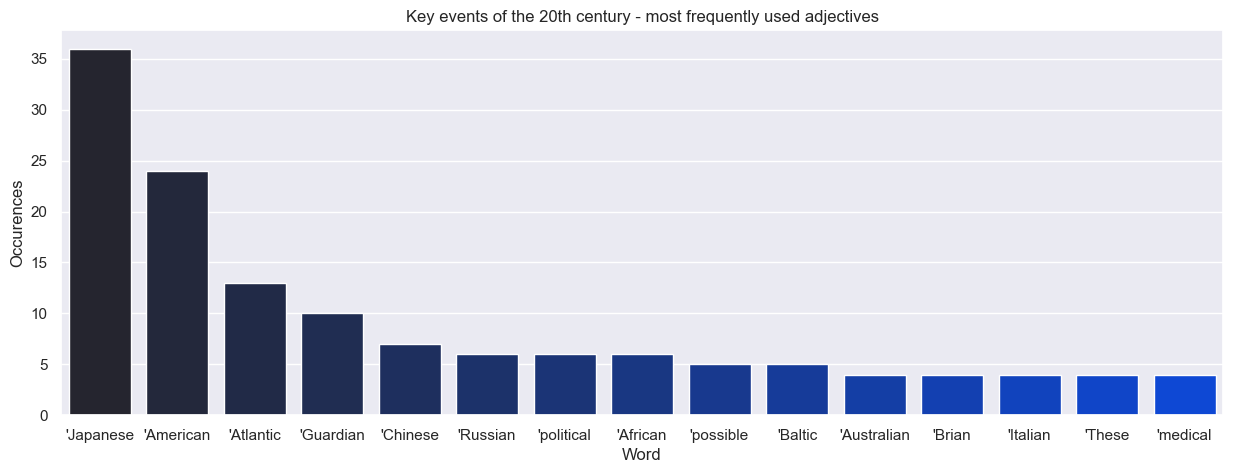

In [38]:
plt.figure(figsize = (15, 5))
with sns.dark_palette('xkcd:blue', 15):
    sns.barplot(x = 'Word', y = 'Occurences',
    saturation = 0.9, data = top15).set_title('Key events of the 20th century - most frequently used adjectives')

#### All of the nationalities stand out first thing. This is not surprising as the text is about key world events. 'Political' is the most frequent adjective that is not a nationality, and it definitely fits the theme of key world events. Words like 'Brian' and 'These' are not adjectives, but for the most part these POS tags appear to be very accuracte.

## Counting Country Occurances

In [39]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Events centuryToggle Events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events century languages Edit link

In [40]:
# Create a count for all words
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [41]:
# Check
all_counts

Counter({'Retrieved': 205,
         'War': 129,
         'war': 91,
         'World': 76,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 43,
         'History': 41,
         'world': 39,
         'www': 39,
         'ISBN': 39,
         'first': 38,
         'century': 36,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'II': 30,
         'United': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'American': 24,
         'history': 23,
         'This': 23,
         'attack': 23,
         'weapons': 23,
         'new': 22,
         'Holocaust': 21,
         'Stalin': 21,
         'Africa': 21,
         'British': 20,
         'North': 2

In [42]:
# Get country list
countries = pd.read_csv('countries_list_20th_century_1.5.csv', index_col = 0)

In [43]:
# Check
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [44]:
# Get list from df
country_list = countries['country_name'].to_list()

In [45]:
# Remove spaces before and after country names
country_list_clean = [s.strip() for s in country_list]

In [46]:
# Count country occurances
dict_of_counts = {d : all_counts[d] for d in country_list_clean}

In [47]:
# Check
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [48]:
# Search for the names from the list in the dictionary and put into df
dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [49]:
# Check
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df = df.transpose().reset_index()

In [51]:
df.dtypes

index    object
0         int64
dtype: object

In [52]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [53]:
df.rename(columns = {'index': 'Country', 0: 'Times mentioned'}, inplace = True)

In [54]:
df

,Country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [55]:
df.shape

(208, 2)

In [56]:
# Filter to show countries mentioned over 2 times
df_filtered = df[df['Times mentioned'] > 2]

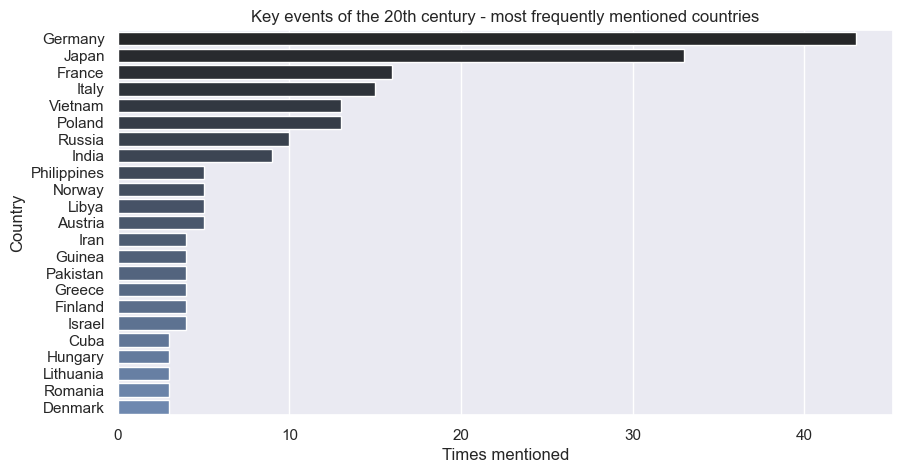

In [57]:
plt.figure(figsize = (10, 5))
with sns.dark_palette('#79C', 27):
    sns.barplot(x = 'Times mentioned', y = 'Country',
    saturation = 0.9, data = df_filtered.sort_values('Times mentioned', ascending = False)).set_title('Key events of the 20th century - most frequently mentioned countries')

#### The first thing I notice is that Germany is mentioned the most times. This aligns with looking at the most frequent nouns earlier where there were a lot of nouns relating to World War 2.

#### It is also noteworthy that the United States is not on this list. Likely the words got separated. Perhaps in the very beginning we could replace common variations of the US (e.g. 'the united states' and 'US') with one word like 'America' and that would more accurately capture the most frequently mentioned countries. A similar approach could be taken for the United Kingdom.

#### Also in our list of countries, 'China, People's Republic of', 'Korea, North', and 'Korea, South' are written in this format that most likely would not match how they appear in our data. In this case it would be easier to replace them in our dataframe of countries.